## Gini Lecture 5 Marisol De La Cruz

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.stats import entropy

## Work Period 5 Questions ##

>  1.	Finish calculating the information gain for the remaining features in the classroom example, so Temperature, Humidity and Windy.


In [13]:
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy',
                'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild',
                    'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal',
                 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})
data
df = pd.DataFrame(data)

In [14]:
target_counts = data['PlayTennis'].value_counts()
print(target_counts)

PlayTennis
Yes    9
No     5
Name: count, dtype: int64


In [15]:
target_counts = df['PlayTennis'].value_counts()
tot_entropy = entropy(target_counts, base=2) 
print(f'Total entropy PlayTennis {tot_entropy}')


print('*'*25 ,'HOT','*'*25 )
hot_df = df[df['Temperature'] == 'Hot']
hot_counts = hot_df['PlayTennis'].value_counts()
hot_entropy = entropy(hot_counts, base=2)
average_hot_entropy = (len(hot_df) / len(df)) * hot_entropy
print(f'play Tennis count {hot_counts}')
print(f"Entropy : {hot_entropy}")
print(f'average of hot entropy  {average_hot_entropy}')

print('*'*25 ,'MILD','*'*25 )
Mild_df = df[df['Temperature'] == 'Mild']
Mild_counts = Mild_df['PlayTennis'].value_counts()
Mild_entropy = entropy(Mild_counts, base=2)
average_Mild_entropy = (len(Mild_df) / len(df)) * Mild_entropy
print(f'play Tennis count {Mild_counts}')
print(f"Entropy : {Mild_entropy}")
print(f'average of Mild entropy  {average_Mild_entropy}')

print('*'*25 ,'COOL','*'*25 )
Cool_df = df[df['Temperature'] == 'Cool']
Cool_counts = Cool_df['PlayTennis'].value_counts()
Cool_entropy = entropy(Cool_counts, base=2)
average_Cool_entropy = (len(Cool_df) / len(df)) * Cool_entropy
print(f'play Tennis count {Cool_counts}')
print(f"Entropy : {Cool_entropy}")
print(f'average of Cool entropy  {average_Cool_entropy}')

print('*'*25 ,'Total Average','*'*25 )
ave_entropy = average_hot_entropy +average_Mild_entropy +average_Cool_entropy
print(f'average entropy  {ave_entropy}')
print('*'*25 ,'Information Gained Entropy','*'*25 )
info_gain_temp = tot_entropy - ave_entropy
print(f'Information Gained Entropy {info_gain_temp}')

Total entropy PlayTennis 0.940285958670631
************************* HOT *************************
play Tennis count PlayTennis
No     2
Yes    2
Name: count, dtype: int64
Entropy : 1.0
average of hot entropy  0.2857142857142857
************************* MILD *************************
play Tennis count PlayTennis
Yes    4
No     2
Name: count, dtype: int64
Entropy : 0.9182958340544894
average of Mild entropy  0.39355535745192405
************************* COOL *************************
play Tennis count PlayTennis
Yes    3
No     1
Name: count, dtype: int64
Entropy : 0.8112781244591328
average of Cool entropy  0.23179374984546652
************************* Total Average *************************
average entropy  0.9110633930116763
************************* Information Gained Entropy *************************
Information Gained Entropy 0.029222565658954758


>  2.	For a data set with 15 features what is the upper bound for the entropy? The unit for Information Theoretic entropy (base 2 log) is the bit.


In [16]:
n_features = 15
upper_entropy = math.log2(n_features)
print(f'15 features what is the upper bound for the entropy {upper_entropy}')

15 features what is the upper bound for the entropy 3.9068905956085187


>  3.	Write Python code to create a bar chart representing the class distribution on the x-axis and entropy values on the y-axis for the following class distributions:  [1.0, 0.0], [0.9, 0.1], [0.8, 0.2], ..., [0.2, 0.8], [0.1, 0.9], [0.0, 1.0]



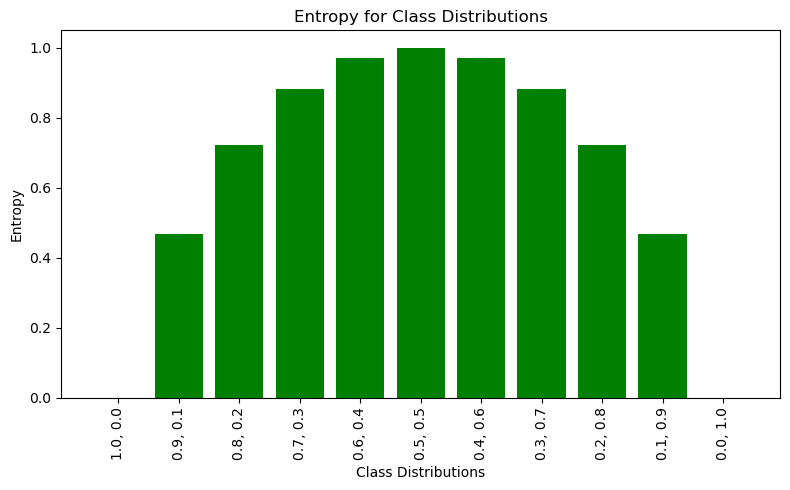

In [21]:
range_values = np.arange(1, -0.1, -0.1)
entropy_values = [entropy([n, 1-n], base=2) for n in range_values]

plt.figure(figsize=(8, 5))
plt.bar([f"{n:.1f}, {1-n:.1f}" for n in range_values], entropy_values, color='green')

# Add labels and title
plt.xlabel('Class Distributions')
plt.ylabel('Entropy')
plt.title('Entropy for Class Distributions')

# Rotate the labels of the x-axis vertically
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

>  4.   You are working with a dataset that has 3 classes: A, B, and C, with the following distribution:
* Class A: 40 samples
* Class B: 35 samples
* Class C: 25 samples. 
Calculate the Gini impurity for this dataset.et.


Total Samples = 40 + 35 + 25 = 100


Gini Impurity for this node would be:

Class A proportion = 40/100 = 0.4
Class B proportion = 35/100 = 0.35
Class C proportion = 25/100 = 0.25
Gini Formula
1 - ((Class A proportion)^2 + (Class B proportion)^2 + (Class C proportion)^2)

In [22]:
# Gini Caluclation
gini = 1 - ((40/100)**2 + (35/100)**2 + (25/100)**2)
print(f"Gini Impurity for this node: {gini}")

Gini Impurity for this node: 0.655
